# Assessing the Performance of Machine Learning Algorithms for Soil Classification Using Cone Penetration Test Data

## Libraries 

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from helper import biplot_pca, plot_elbow, biplot_kmeans, plot_cluster_radar, BCSS

## Data Preprocessing

### Read data

In [2]:
soil_data = pd.read_pickle("data_input/soil_behaviour_type_cpt.pkl")
soil_data.head()

,depth,qc,fs,Rf,lc,soil_type
0,0.015,3930.0,5.4,0.001374,1.242170,gravelly sands to dense sand
1,0.020,5060.0,5.4,0.001067,1.309667,gravelly sands to dense sand
2,0.025,5350.0,9.8,0.001832,1.331114,sands
3,0.030,5620.0,9.8,0.001744,1.350951,sands
4,0.035,5950.0,11.7,0.001966,1.376021,sands


### Data Cleansing

In [3]:
soil_num = soil_data.drop(columns=['Rf', 'lc', 'soil_type'])

In [4]:
soil_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221139 entries, 0 to 229982
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   depth   221139 non-null  float64
 1   qc      221139 non-null  float64
 2   fs      221139 non-null  float64
dtypes: float64(3)
memory usage: 6.7 MB


### Scaling the data

In [5]:
# Scale the features using StandardScaler

scaler = StandardScaler()
soil_num_scaled = scaler.fit_transform(soil_num)

## K-Means Clustering

### Find appropriate K

In [6]:
soil_data['soil_type'].value_counts()

soil_type
sands                           123750
gravelly sands to dense sand     96634
sand mixtures                      536
silt mixtures                       89
clays                               79
organic soil                        51
Name: count, dtype: int64

In [7]:
soil_data['soil_type'].nunique()

6

We know from actual dataset, there's six soil types, so we use that as starter.

### Fitting the model 

In [25]:
kmeans_geotech = KMeans(n_clusters=6, random_state=123).fit(soil_num_scaled)

In [11]:
kmeans_geotech.labels_

array([4, 3, 3, ..., 2, 2, 2], dtype=int32)

### [Additional] Visualization with PCA

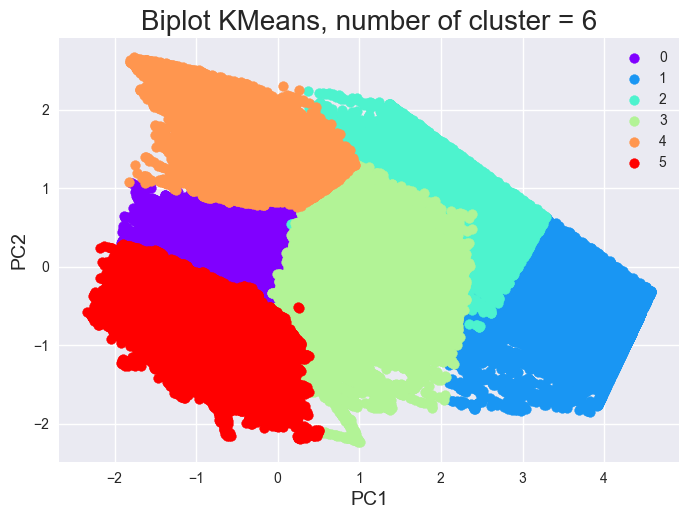

In [26]:
biplot_kmeans(soil_num_scaled, 6)

### Goodness of fit

In [14]:
# Within Sum of Squares
kmeans_geotech.inertia_

136834.7560807102

In [16]:
BCSS_balance = BCSS(soil_num_scaled, kmeans_geotech)
BCSS_balance

526804.2248244485

In [17]:
TSS_balance = kmeans_geotech.inertia_ + BCSS_balance
TSS_balance

663638.9809051587

In [18]:
explained_variance = (BCSS_balance/TSS_balance)
explained_variance

0.7938114546947245

Number of iterations that occurred:

In [20]:
kmeans_geotech.n_iter_

8

### Visualization: plot elbow

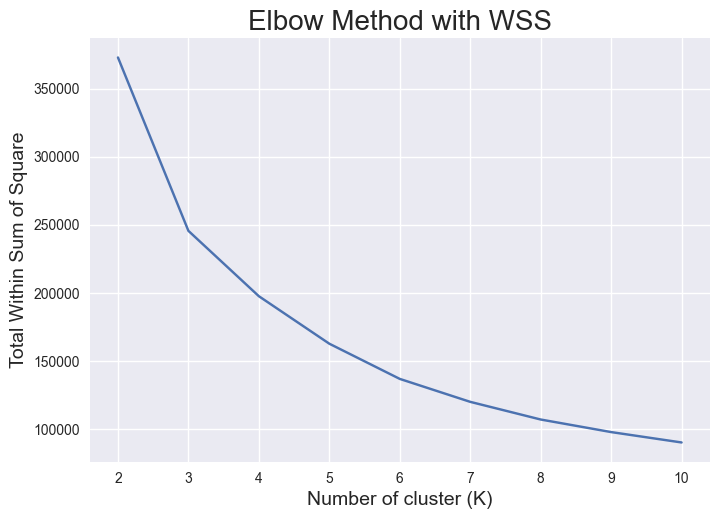

In [24]:
plot_elbow(soil_num_scaled)